In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
%run sqlite_execution.py
db1 = DB_V1()
# db1.drop_duplicates()
# db1.cur.execute("UPDATE captchas_v1 SET captcha_string = 'headphones' WHERE captcha_string = 'Please click each image containing headphones'")
# db1.cur.execute("UPDATE captchas_v1 SET file_path = REPLACE(file_path, 'Please click each image containing headphones', 'headphones')")
# db1.commit()
info = db1.get_info()
info

,total,solved,unsolved
bonsai tree,1235,642,593
cup of orange juice,1046,544,502
laptop,1120,501,619
flower,1670,500,1170
tree,2008,464,1544
car,1493,359,1134
motorcycle,1335,309,1026
headphones,586,245,341
helicopter,242,242,0
violin,249,235,14


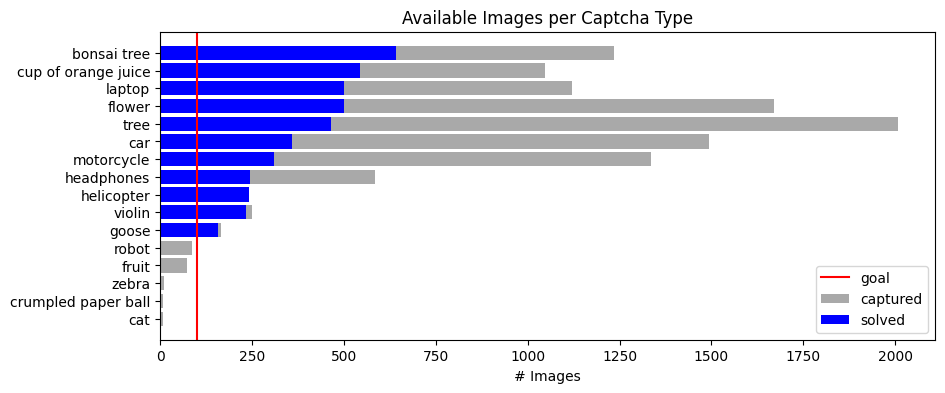

In [3]:
%run visualizer.py
plot_captcha_info(info, figsize=(4,10))

In [4]:
model_info = db1.get_model_info()
model_info

,date,path,train_samples,test_samples,accuracy,better_than_90,better_than_95
cup of orange juice,2023-08-15,cup of orange juice/23-227_01,192,83,1.000000,1.000000,1.000000
laptop,2023-08-15,laptop/23-227_03,368,133,0.984962,0.999987,0.991284
car,2023-08-15,car/23-227_01,256,103,0.980583,0.999759,0.967406
motorcycle,2023-08-15,motorcycle/23-227_01,224,85,0.976471,0.998653,0.930050
tree,2023-08-15,tree/23-227_01,336,128,0.968750,0.999188,0.887323
flower,2023-08-15,flower/23-227_01,368,132,0.931818,0.920240,0.216006
bonsai tree,2023-08-15,bonsai tree/23-227_01,480,162,0.913580,0.754704,0.033359
headphones,2023-08-15,headphones/23-227_01,176,69,0.898551,0.542486,0.056654
helicopter,2023-08-15,helicopter/23-227_01,176,66,0.893939,0.494087,0.046416
violin,2023-08-15,violin/23-227_01,176,59,0.830508,0.066589,0.000644


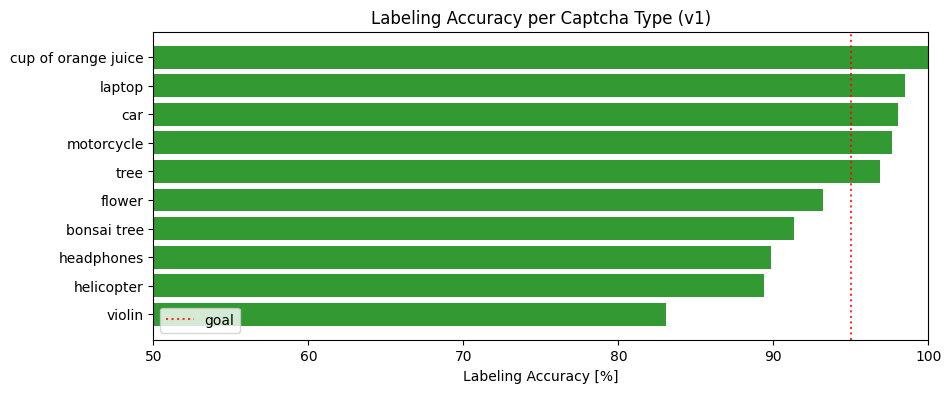

In [5]:
%run visualizer.py
plot_model_accuracy(model_info)

In [6]:
db1.load_models_into_src()

cup of orange juice cup of orange juice/23-227_01
File copied and renamed to: ../src/hcaptcha_solver/models//cup of orange juice
laptop laptop/23-227_03
File copied and renamed to: ../src/hcaptcha_solver/models//laptop
car car/23-227_01
File copied and renamed to: ../src/hcaptcha_solver/models//car
motorcycle motorcycle/23-227_01
File copied and renamed to: ../src/hcaptcha_solver/models//motorcycle
tree tree/23-227_01
File copied and renamed to: ../src/hcaptcha_solver/models//tree
flower flower/23-227_01
File copied and renamed to: ../src/hcaptcha_solver/models//flower
bonsai tree bonsai tree/23-227_01
File copied and renamed to: ../src/hcaptcha_solver/models//bonsai tree


In [7]:
assert 1 == 0 # to avoid execution of code below

AssertionError: 

In [8]:
%run collector/collector.py
urls = [
    "https://accounts.hcaptcha.com/demo",
    "https://nopecha.com/demo/hcaptcha",
    "https://democaptcha.com/demo-form-eng/hcaptcha.html",
    "https://freebitco.in/signup/?op=s", 
    "https://accounts.shopify.com/signup?rid=f8d4b2e6-f0fe-41ab-83e5-e633974bd42b&signup_strategy=password",
    "https://www.dierenkliniekoudorp.nl/",
    "https://cellar335.com/",
    "https://www.salumificiovecchi.it/",
    "https://economygarages.com/",
    "https://www.assimilationdesigns.com/"
    "https://raleighvehiclewraps.com/"
    ]
collect_data(db1, urls[0], count=100, collect_v2=True, limit=2000)

Loaded Website
Launched hCaptcha
Switched to Captcha
Captcha V1
tree            : Captcha string is limited, skipping
Captcha V1
tree            : Captcha string is limited, skipping
Captcha V1
tree            : Captcha string is limited, skipping
Captcha V1
tree            : Captcha string is limited, skipping
Captcha V2
Saved screenshot to ../data/images/v2/dog/15-17-05-51-125391.png
Captcha V1
cup of orange juice: Added 9 rows to db
Captcha V1
cup of orange juice: Saved 9 images to disk
cup of orange juice: Added 9 rows to db
Captcha V1
cup of orange juice: Saved 9 images to disk
cup of orange juice: Added 9 rows to db
Captcha V1
cup of orange juice: Saved 9 images to disk
cup of orange juice: Added 9 rows to db
Captcha V1
cup of orange juice: Saved 9 images to disk
tree            : Captcha string is limited, skipping
Captcha V1
tree            : Captcha string is limited, skipping
Captcha V1
tree            : Captcha string is limited, skipping
Captcha V1
tree            : Captcha

ERROR: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=115.0.5790.171)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x0107A813+48355]
	(No symbol) [0x0100C4B1]
	(No symbol) [0x00F15358]
	(No symbol) [0x00EFD293]
	(No symbol) [0x00F5E37B]
	(No symbol) [0x00F6C473]
	(No symbol) [0x00F5A536]
	(No symbol) [0x00F382DC]
	(No symbol) [0x00F393DD]
	GetHandleVerifier [0x012DAABD+2539405]
	GetHandleVerifier [0x0131A78F+2800735]
	GetHandleVerifier [0x0131456C+2775612]
	GetHandleVerifier [0x011051E0+616112]
	(No symbol) [0x01015F8C]
	(No symbol) [0x01012328]
	(No symbol) [0x0101240B]
	(No symbol) [0x01004FF7]
	BaseThreadInitThunk [0x758400F9+25]
	RtlGetAppContainerNamedObjectPath [0x77917BBE+286]
	RtlGetAppContainerNamedObjectPath [0x77917B8E+238]

Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=115.0.5790.171)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x0107A813

In [ ]:
%run pytorch_training.py
# train_model_on_captcha_string(db1, "laptop", save=True, epochs=10)
train_models_on_all_captcha_strings(db1, threshold=200, save=True)

Training model on bonsai tree...
Fount 642 useable images
x shape: (642, 3, 128, 128)
y shape: (642, 1)
train size: 480, test size: 162
single element shape: torch.Size([3, 128, 128])
Epoch: 1, Test Loss: 0.0037, Accuracy: 115/162, 70.99%
Epoch: 2, Test Loss: 0.0034, Accuracy: 115/162, 70.99%
Epoch: 3, Test Loss: 0.0025, Accuracy: 138/162, 85.19%
Epoch: 4, Test Loss: 0.0019, Accuracy: 143/162, 88.27%
Epoch: 5, Test Loss: 0.0017, Accuracy: 148/162, 91.36%
Epoch: 6, Test Loss: 0.0017, Accuracy: 148/162, 91.36%
Epoch: 7, Test Loss: 0.0015, Accuracy: 148/162, 91.36%
Epoch: 8, Test Loss: 0.0015, Accuracy: 148/162, 91.36%
Epoch: 9, Test Loss: 0.0014, Accuracy: 150/162, 92.59%
Epoch: 10, Test Loss: 0.0018, Accuracy: 146/162, 90.12%
Epoch: 11, Test Loss: 0.0017, Accuracy: 146/162, 90.12%
Epoch: 12, Test Loss: 0.0014, Accuracy: 148/162, 91.36%
Epoch: 13, Test Loss: 0.0021, Accuracy: 146/162, 90.12%
Epoch: 14, Test Loss: 0.0015, Accuracy: 147/162, 90.74%
Epoch: 15, Test Loss: 0.0016, Accuracy: 1

In [ ]:
%run manual_classifier.py
mc = Manual_Classifier(db1)

In [ ]:
%run vilt.py
vilt = Vilt_Classifier()

In [ ]:
vilt_accuracy = pd.concat((info, vilt.get_accuracy_for_all_captchas(db1)), axis=1)
plot_model_accuracy(vilt_accuracy, figsize=(4,10))